In [63]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'results.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==False]
df['bayes_error'] = np.mean(df['bayes_error'])
const = 0.005
df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') + const
df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') + const
df.dtypes

<class 'pandas.core.frame.DataFrame'>


kernel_df                 int64
beta                      int64
bayes_error             float64
n_source                  int64
n_target                  int64
labeled                    bool
classical                object
supervised               object
lipton                   object
oracle                   object
prop-target-estimate     object
iter                      int64
setup                    object
lipton-excess           float32
oracle-excess           float32
dtype: object

In [64]:
measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)
result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        32       50      0.249610  0.129099      0.145867  0.028773
1        50       32      0.202717  0.112687      0.126380  0.026891
2        50       64      0.203330  0.108370      0.126450  0.027110
3        50      128      0.200105  0.106581      0.131590  0.029854
4        50      256      0.209292  0.108152      0.132517  0.029588
5        50      512      0.211860  0.107436      0.128965  0.025944
6        50     1024      0.209055  0.105050      0.129555  0.025876
7        50     2048      0.212770  0.107421      0.130005  0.024983
8        50     4096      0.213695  0.111687      0.128395  0.026884
9        64       50      0.174110  0.095990      0.115717  0.024160
10      128       50      0.102910  0.050534      0.085360  0.022074
11      256       50      0.061547  0.027747      0.056537  0.018340
12      512       50      0.032900  0.018033      0.031410  0.016193
13     1024       50      0.014380  0.016696      0.014225  0.016537
14     2048       50      0.001322  0.014598      0.001482  0.014715

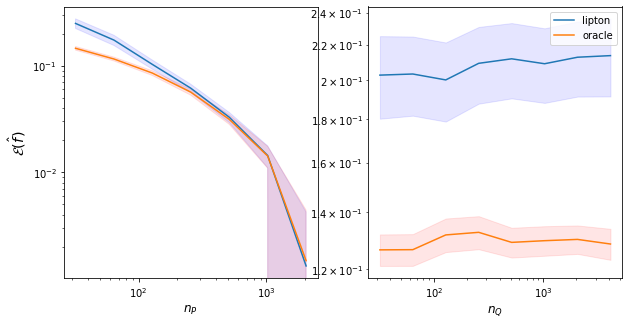

In [65]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [66]:
exp = 'results.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==True]

df['classical-excess'] = (df['classical'] - df['bayes_error']).astype('float32')
df['labeled-excess'] = (df['labeled'] - df['bayes_error']).astype('float32')

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

<class 'pandas.core.frame.DataFrame'>


DataError: No numeric types to aggregate

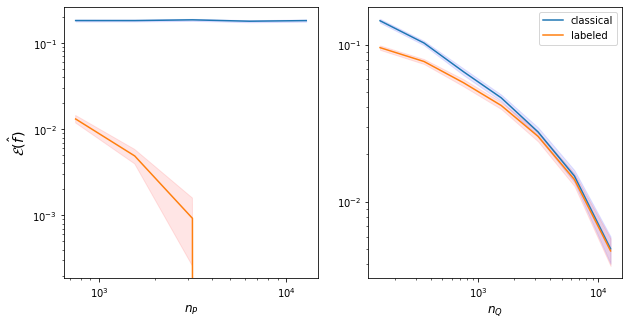

In [18]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()